## Uber Ride Price Prediction

### Problem Description

The objective of this project is to develop a Machine Learning model capable of predicting the price of Uber rides based on several factors, such as distance, time, weather conditions, type of service, among others. Accurate forecasts can help both passengers and drivers better understand the costs involved and optimize service supply and demand.

### Objective

Build a predictive model that estimates the price of an Uber ride, using regression techniques and advanced hyperparameter tuning approaches.

In [6]:
import sys
print(f"Running with Python located at: {sys.executable}")

Running with Python located at: /usr/local/python/3.12.1/bin/python3


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import time
import os

import folium
from folium.plugins import HeatMap

from sklearn.feature_selection import RFE

### Reading data

In [12]:
file_path = 'data/rideshare_kaggle.csv'
if not os.path.exists(file_path):
    raise FileNotFoundError(f"The file {file_path} was not found.")

In [14]:
# Display the size of the DataFrame
print(f"DataFrame Dimensions: {df.shape}")

# Display column data types
print("\nColumn Data Types:")
print(df.dtypes)

# Check null values
print("\nNull Values per Column:")
print(df.isnull().sum())

Dimensões do DataFrame: (114680, 57)

Tipos de Dados das Colunas:
id                              object
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                        object
timezone                        object
source                          object
destination                     object
cab_type                        object
product_id                      object
name                            object
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                   object
long_summary                    object
precipIntensity                float64
precipProbability              float64
humidity                       float6

In [15]:
# Display the first 5 transposed lines
print(df.head(5).T)

# Display the last 5 transposed lines
print(df.tail(5).T)

                                                                0  \
id                           424553bb-7174-41ea-aeb4-fe06d4f4b9d7   
timestamp                                           1544952607.89   
hour                                                            9   
day                                                            16   
month                                                          12   
datetime                                      2018-12-16 09:30:07   
timezone                                         America/New_York   
source                                           Haymarket Square   
destination                                         North Station   
cab_type                                                     Lyft   
product_id                                              lyft_line   
name                                                       Shared   
price                                                         5.0   
distance                          

In [18]:
df = pd.read_csv('data/rideshare_kaggle.csv', 
                 sep=',', 
                 encoding='utf-8', 
                 dtype={
                     'id': 'str',
                     'timestamp': 'float64',
                     'hour': 'int64',
                     'day': 'int64',
                     'month': 'int64',
                     'datetime': 'str',
                     'timezone': 'str',
                     'source': 'str',
                     'destination': 'str',
                     'cab_type': 'str',
                     'product_id': 'str',
                     'name': 'str',
                     'price': 'float64',
                     'distance': 'float64',
                     'surge_multiplier': 'float64',
                     'latitude': 'float64',
                     'longitude': 'float64',
                     'temperature': 'float64',
                     'apparentTemperature': 'float64',
                     'short_summary': 'str',
                     'long_summary': 'str',
                     'precipIntensity': 'float64',
                     'precipProbability': 'float64',
                     'humidity': 'float64',
                     'windSpeed': 'float64',
                     'windGust': 'float64',
                     'windGustTime': 'float64',
                     'visibility': 'float64',
                     'temperatureHigh': 'float64',
                     'temperatureHighTime': 'float64',
                     'temperatureLow': 'float64',
                     'temperatureLowTime': 'float64',
                     'apparentTemperatureHigh': 'float64',
                     'apparentTemperatureHighTime': 'float64',
                     'apparentTemperatureLow': 'float64',
                     'apparentTemperatureLowTime': 'float64',
                     'icon': 'str',
                     'dewPoint': 'float64',
                     'pressure': 'float64',
                     'windBearing': 'float64',
                     'cloudCover': 'float64',
                     'uvIndex': 'float64',
                     'visibility.1': 'float64',
                     'ozone': 'float64',
                     'sunriseTime': 'float64',
                     'sunsetTime': 'float64',
                     'moonPhase': 'float64',
                     'precipIntensityMax': 'float64',
                     'uvIndexTime': 'float64',
                     'temperatureMin': 'float64',
                     'temperatureMinTime': 'float64',
                     'temperatureMax': 'float64',
                     'temperatureMaxTime': 'float64',
                     'apparentTemperatureMin': 'float64',
                     'apparentTemperatureMinTime': 'float64',
                     'apparentTemperatureMax': 'float64',
                     'apparentTemperatureMaxTime': 'float64'
                 },
                 on_bad_lines='warn')

missing_data = df.isnull().sum()
print("Missing values per column:\n", missing_data)

rows_with_nan = df.isnull().any(axis=1).sum()
print(f"\nNumber of rows with at least one Na: {rows_with_nan}")

Missing values per column:
 id                                0
timestamp                         0
hour                              0
day                               0
month                             0
datetime                          0
timezone                          0
source                            0
destination                       0
cab_type                          0
product_id                        0
name                              0
price                          9084
distance                          0
surge_multiplier                  1
latitude                          1
longitude                         1
temperature                       1
apparentTemperature               1
short_summary                     1
long_summary                      1
precipIntensity                   1
precipProbability                 1
humidity                          1
windSpeed                         1
windGust                          1
windGustTime                      1


In [24]:
print("First 5 lines of DataFrame:")
print(df.head())

SyntaxError: invalid syntax (1964430241.py, line 1)

### Removing unnecessary columns

In [12]:
drop_cols = ['timezone', 'product_id', 'short_summary', 'long_summary', 'windGustTime', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime']

df2 = df.drop(drop_cols, axis=1)
df2.columns = df2.columns.str.replace(' ', '_').str.lower()
df2 = df2.set_index('id')

### Data split

In [13]:
random_seed = 42

In [14]:
df_full_train, df_test = train_test_split(df2, test_size=0.2, random_state=random_seed)
len(df_full_train), len(df_test)

(91744, 22936)

### EDA

In [16]:
df_full_train.sample(10)

,timestamp,hour,day,month,datetime,source,destination,cab_type,name,price,...,latitude,longitude,temperature,apparenttemperature,precipintensity,precipprobability,humidity,windspeed,windgust,visibility
id,,,,,,,,,,,,,,,,,,,,,
538908d2-969a-4607-b722-82383c9bce98,1.543445e+09,22,28,11,2018-11-28 22:44:08,Northeastern University,Financial District,Uber,UberXL,23.0,...,42.3647,-71.0542,40.43,34.59,0.0000,0.00,0.64,9.08,12.72,10.000
c52be751-4234-4262-a3ad-ee89e43e6f6d,1.543515e+09,18,29,11,2018-11-29 18:18:01,Fenway,Theatre District,Lyft,Lux,19.5,...,42.2148,-71.0330,43.65,37.25,0.0000,0.00,0.52,12.55,23.67,9.920
737f9737-fbb7-40c0-8c9a-df641ebe8222,1.543655e+09,8,1,12,2018-12-01 08:58:00,North End,North Station,Uber,Black SUV,26.0,...,42.2148,-71.0330,32.34,28.52,0.0000,0.00,0.81,3.95,3.95,9.949
562f8daf-744e-41d1-a6ff-b1b103199af0,1.544750e+09,1,14,12,2018-12-14 01:20:12,Beacon Hill,Haymarket Square,Uber,Black SUV,27.0,...,42.3398,-71.0892,30.64,30.64,0.0000,0.00,0.65,2.40,3.33,10.000
dae0498e-682b-4a39-a6b6-4553047ed2b2,1.543871e+09,21,3,12,2018-12-03 21:08:00,Beacon Hill,Northeastern University,Lyft,Lyft,9.0,...,42.3519,-71.0643,50.43,50.43,0.0000,0.00,0.50,7.21,10.33,9.972
ae30c203-91d5-4d25-95dc-7dd1e3970cc3,1.544921e+09,0,16,12,2018-12-16 00:50:13,Northeastern University,Back Bay,Uber,Taxi,NaN,...,42.3661,-71.0631,43.96,40.80,0.0000,0.00,0.68,5.48,8.73,10.000
1d20febc-1ea7-4295-90de-9a730a4b999f,1.543760e+09,14,2,12,2018-12-02 14:13:01,Back Bay,North End,Lyft,Lyft XL,16.5,...,42.3588,-71.0707,43.51,39.58,0.0832,1.00,0.96,6.60,8.47,2.644
3cb09309-b11f-4bf3-9374-9864250fb5ed,1.543860e+09,17,3,12,2018-12-03 17:52:57,Back Bay,North End,Lyft,Lux Black,27.5,...,42.3505,-71.1054,54.59,54.59,0.0000,0.00,0.63,9.43,15.07,10.000
b97c4b29-7739-4bad-a567-119eed3ecd0f,1.543783e+09,20,2,12,2018-12-02 20:33:00,North End,Back Bay,Lyft,Lyft XL,19.5,...,42.3505,-71.1054,49.70,49.70,0.0050,0.59,0.96,2.86,2.86,1.348


In [17]:
df_full_train.shape

(91744, 22)

### Missing values

In [18]:
df_full_train.isnull().sum()

timestamp                 0
hour                      0
day                       0
month                     0
datetime                  0
source                    0
destination               0
cab_type                  0
name                      0
price                  7213
distance                  0
surge_multiplier          1
latitude                  1
longitude                 1
temperature               1
apparenttemperature       1
precipintensity           1
precipprobability         1
humidity                  1
windspeed                 1
windgust                  1
visibility                1
dtype: int64

In [19]:
print(f'Percentage of missing values in price column {round(df_full_train.isnull().sum().sum()*100/df_full_train.shape[0],2)}%')

Percentage of missing values in price column 7.87%


In [20]:
df_full_train = df_full_train.dropna()

In [21]:
df_full_train.columns

Index(['timestamp', 'hour', 'day', 'month', 'datetime', 'source',
       'destination', 'cab_type', 'name', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparenttemperature', 'precipintensity', 'precipprobability',
       'humidity', 'windspeed', 'windgust', 'visibility'],
      dtype='object')

In [22]:
df_full_train['timestamp'] = pd.to_datetime(df_full_train['timestamp'], unit='s')
df_full_train['datetime'] = pd.to_datetime(df_full_train['datetime'])

In [24]:
numerical_cols = ['price', 'distance', 'temperature', 'humidity', 'precipintensity', 'visibility']
cat_cols = ['source', 'destination', 'cab_type', 'name']
time_cols = ['hour', 'day']

In [25]:
def plot_univariate(df, list_vars):

    sns.set_style("whitegrid")
    plt.figure(figsize=(15, 10))
    for v in range(len(list_vars)):
        plt.subplot(3, 2, v+1)
        sns.histplot(df[list_vars[v]], bins=50, kde=False)
        plt.title(f'Distribution of {list_vars[v]}')
        plt.xlabel(f'{list_vars[v]}')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

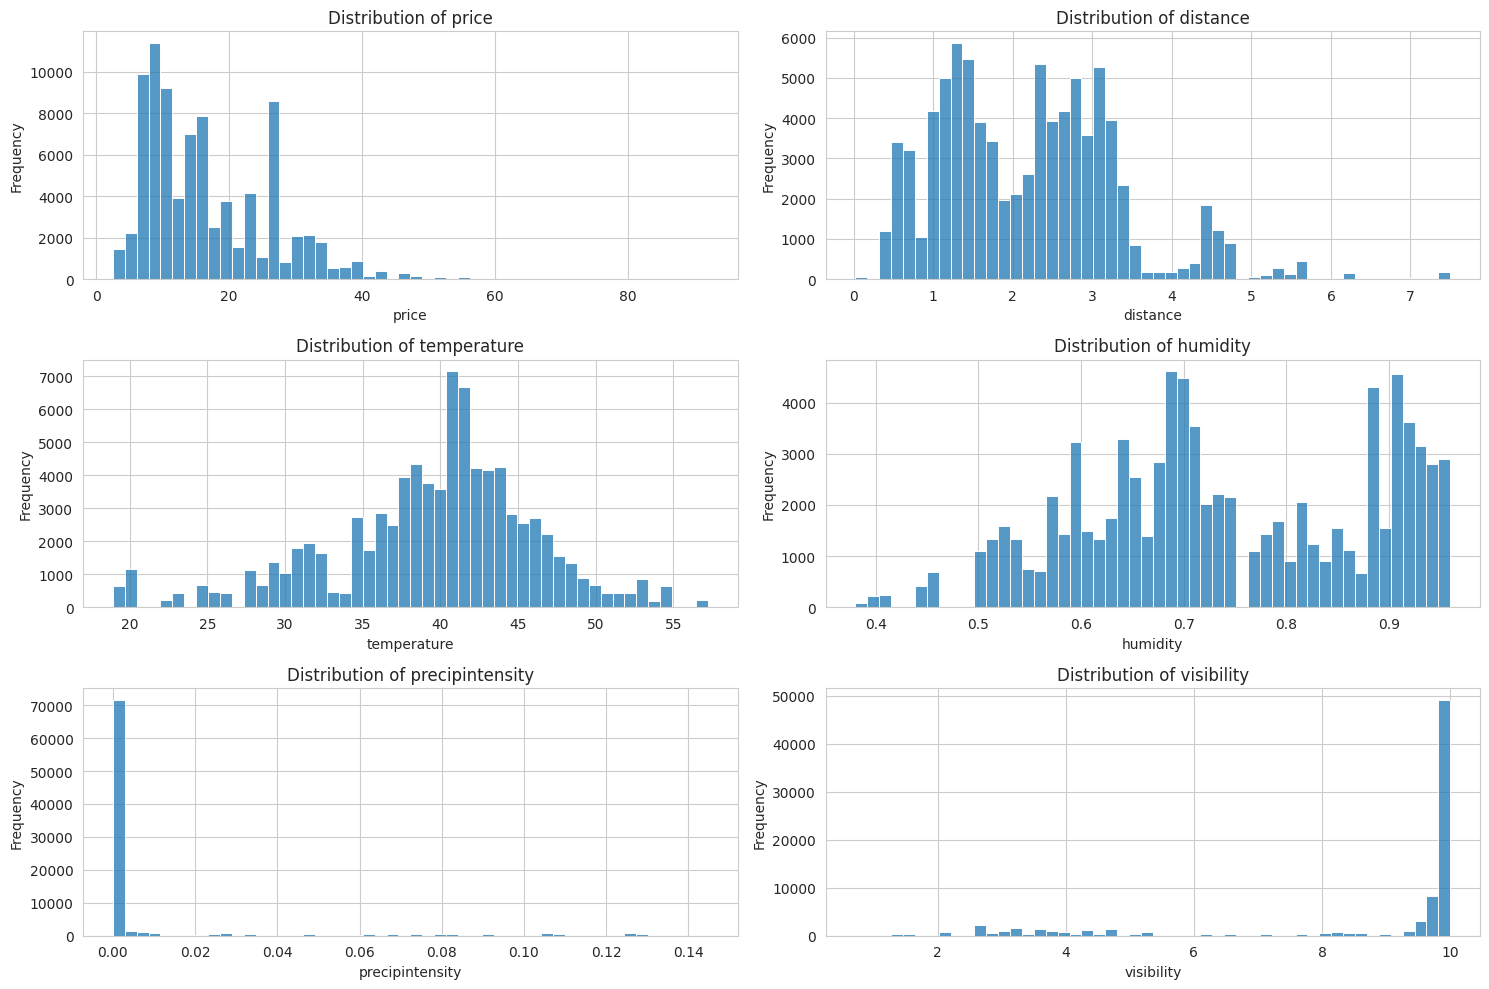

In [26]:
plot_univariate(df_full_train, numerical_cols)

In [27]:
def plot_categorical(df, list_vars, limit_cols=10):

    sns.set_style("whitegrid")
    plt.figure(figsize=(20, 15))
    for v in range(len(list_vars)):
        plt.subplot(2, 2, v+1)
        sns.countplot(data=df, y=list_vars[v], hue=list_vars[v],
                      order=df[list_vars[v]].value_counts().iloc[:limit_cols].index, palette='Spectral')
        plt.title(f'Count Distribution of {list_vars[v]}')
        plt.xlabel(f'{list_vars[v]}')
        plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

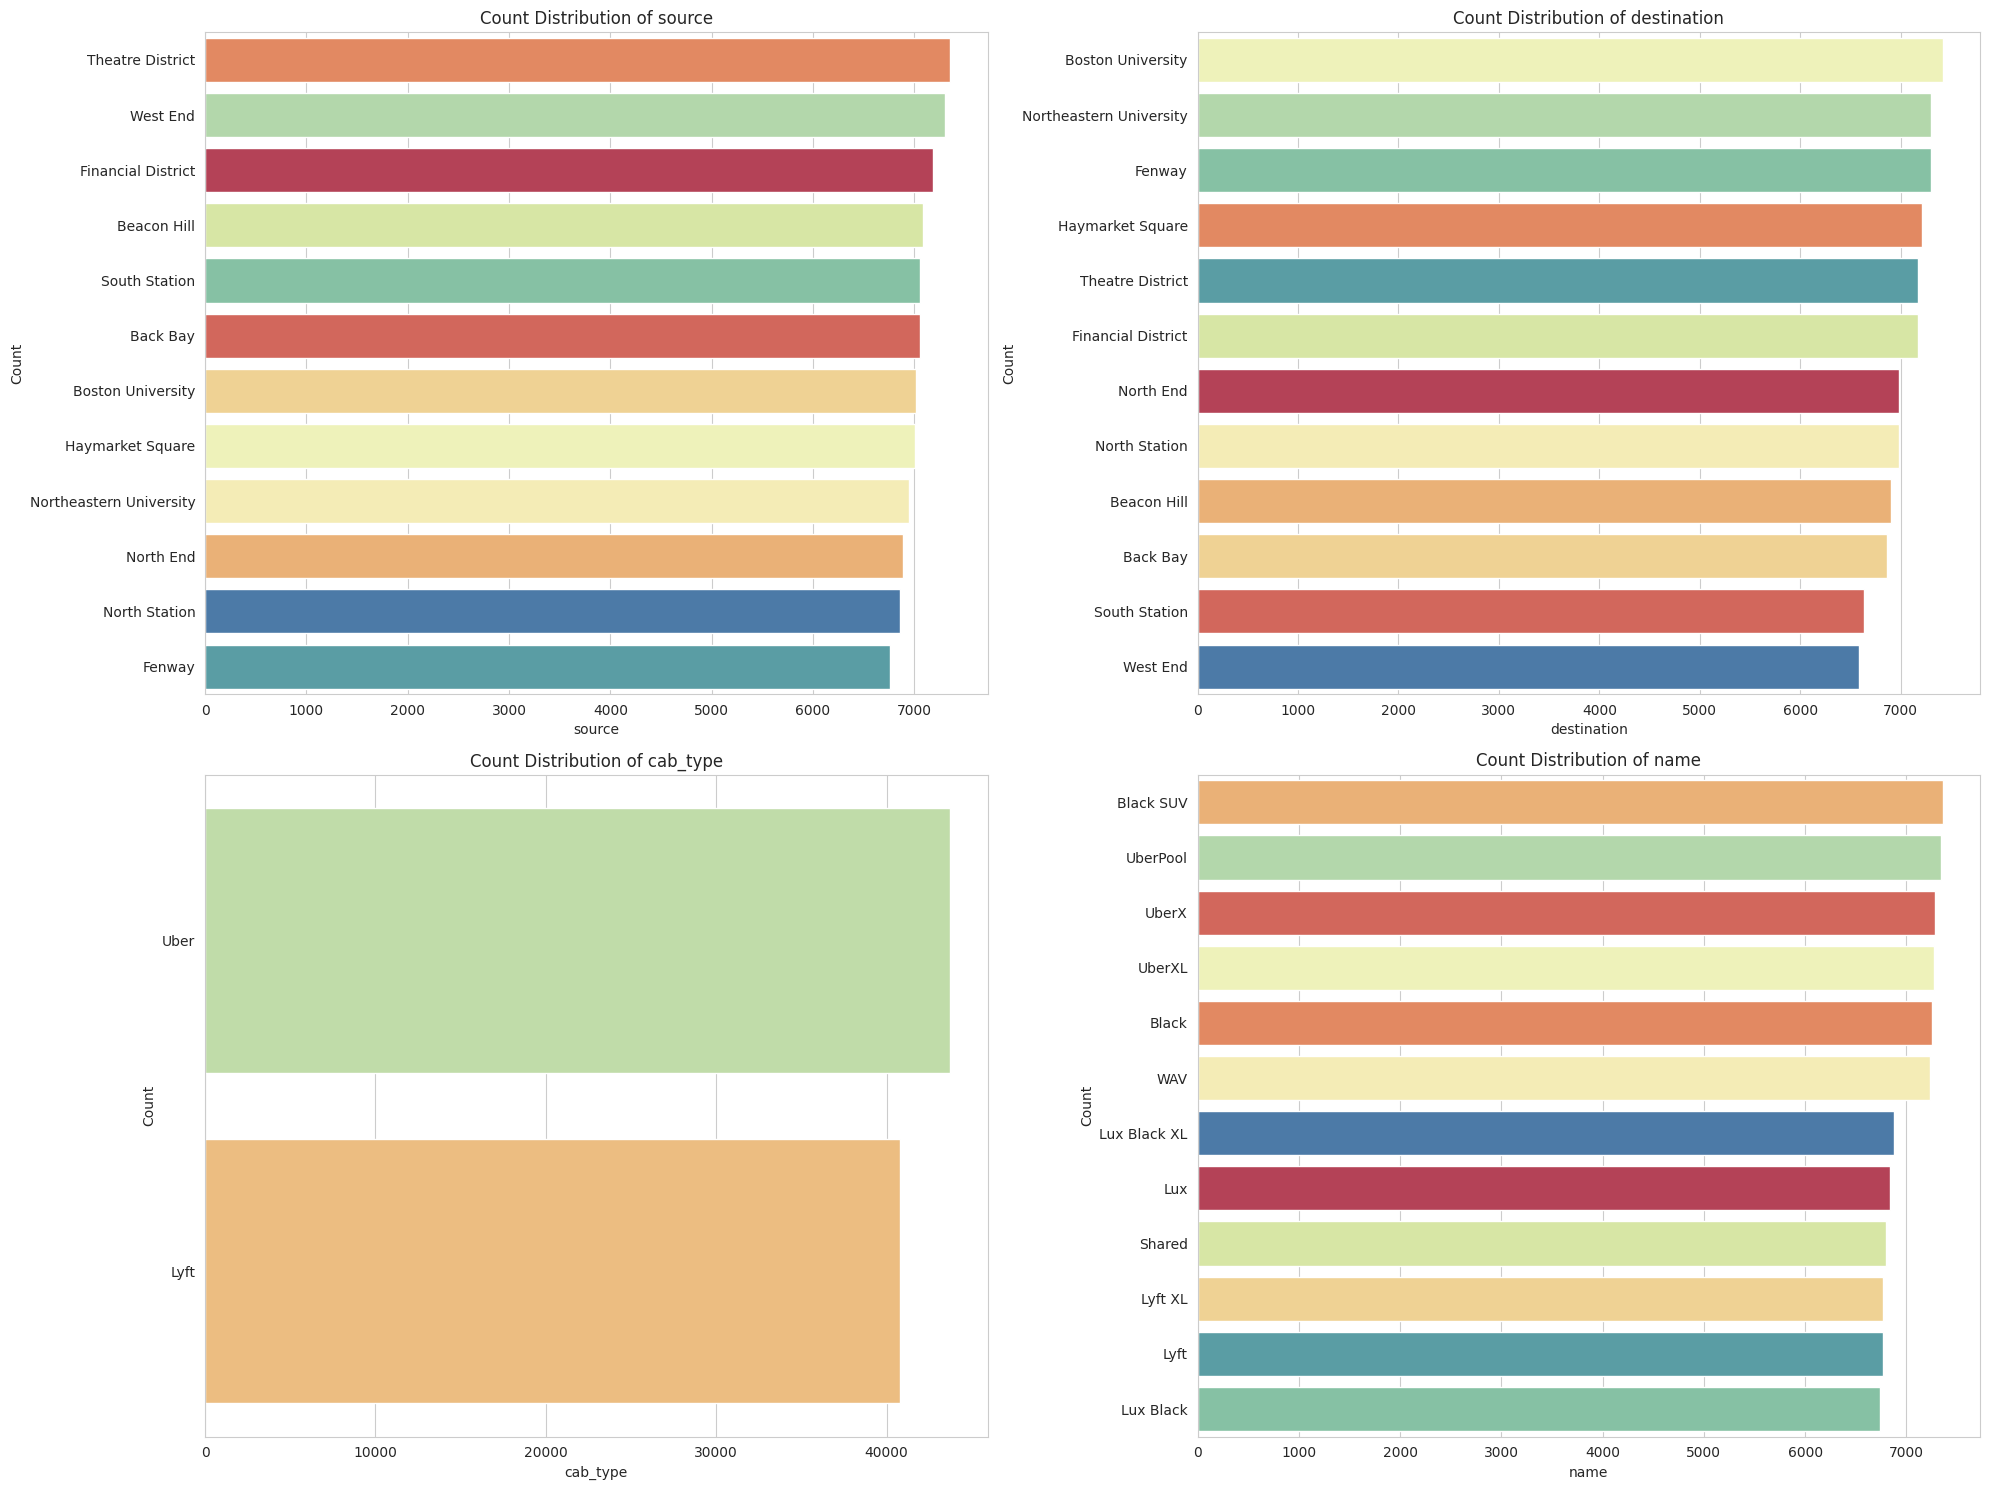

In [28]:
plot_categorical(df_full_train, cat_cols, 15)

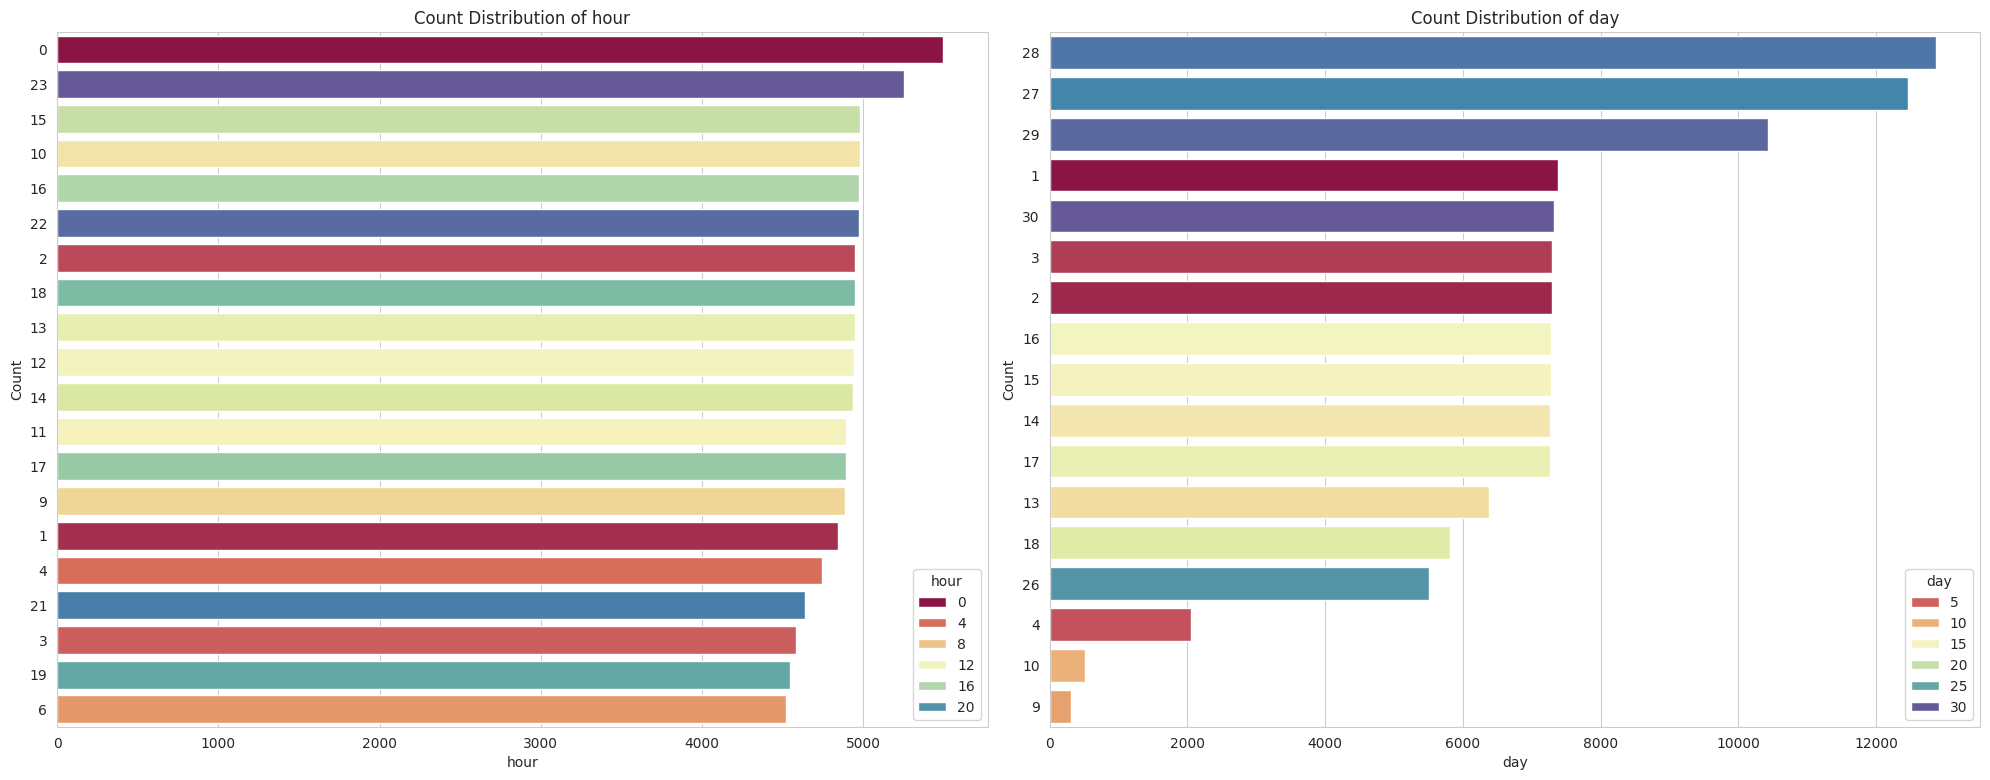

In [29]:
plot_categorical(df2, time_cols, 20)

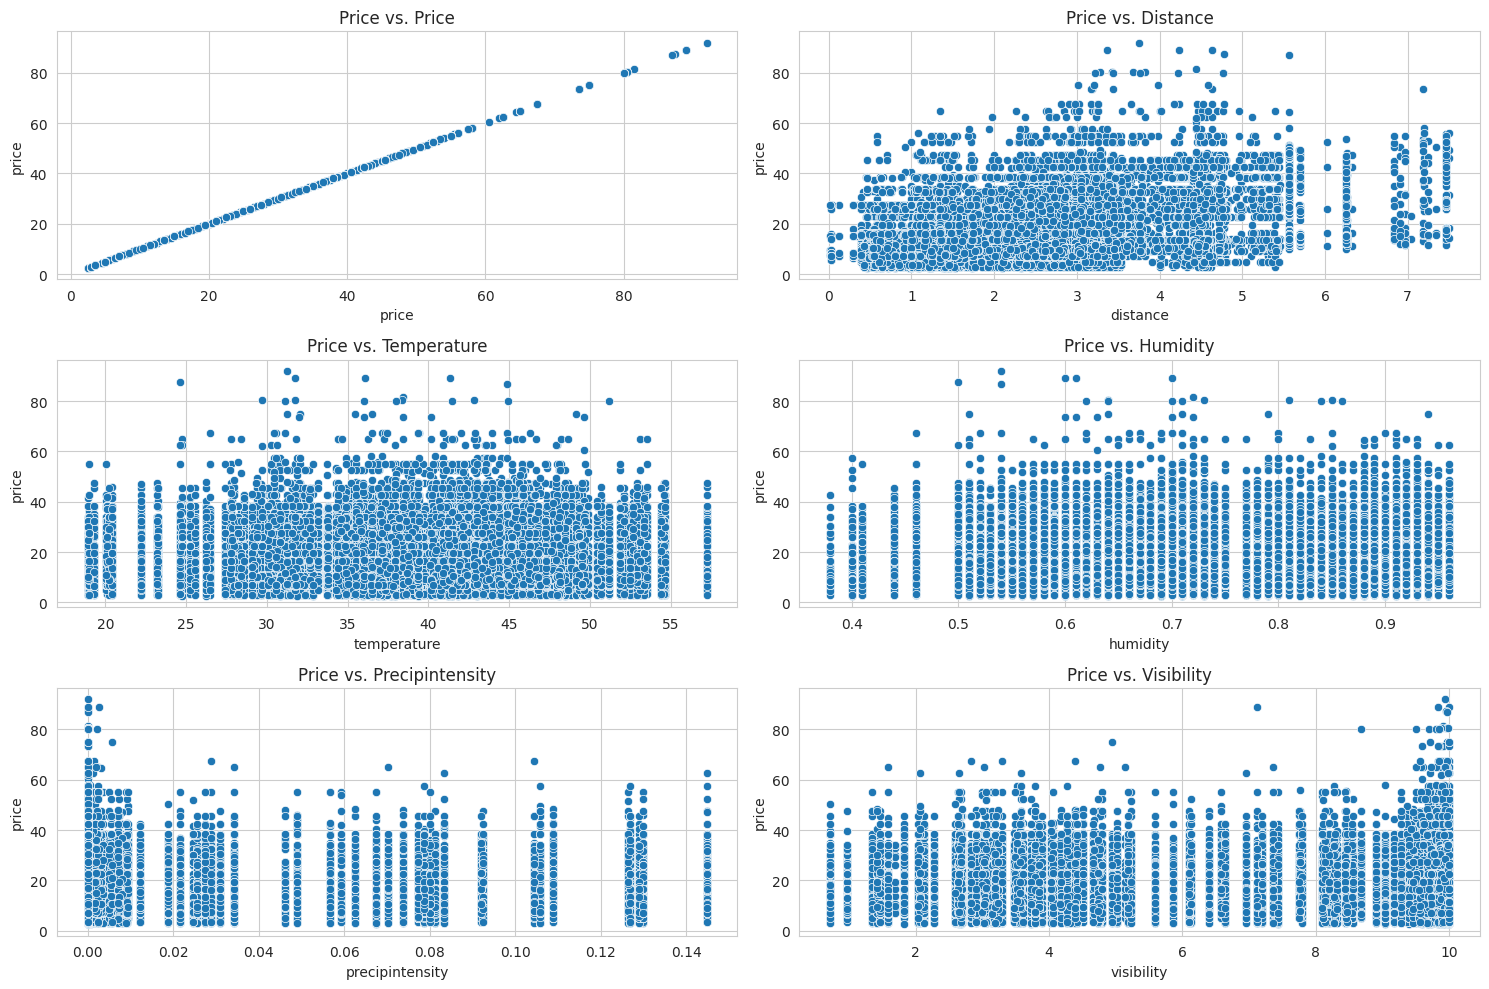

In [31]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=df_full_train[feature], y=df_full_train['price'])
    plt.title(f'Price vs. {feature.capitalize()}')

plt.tight_layout()
plt.show()

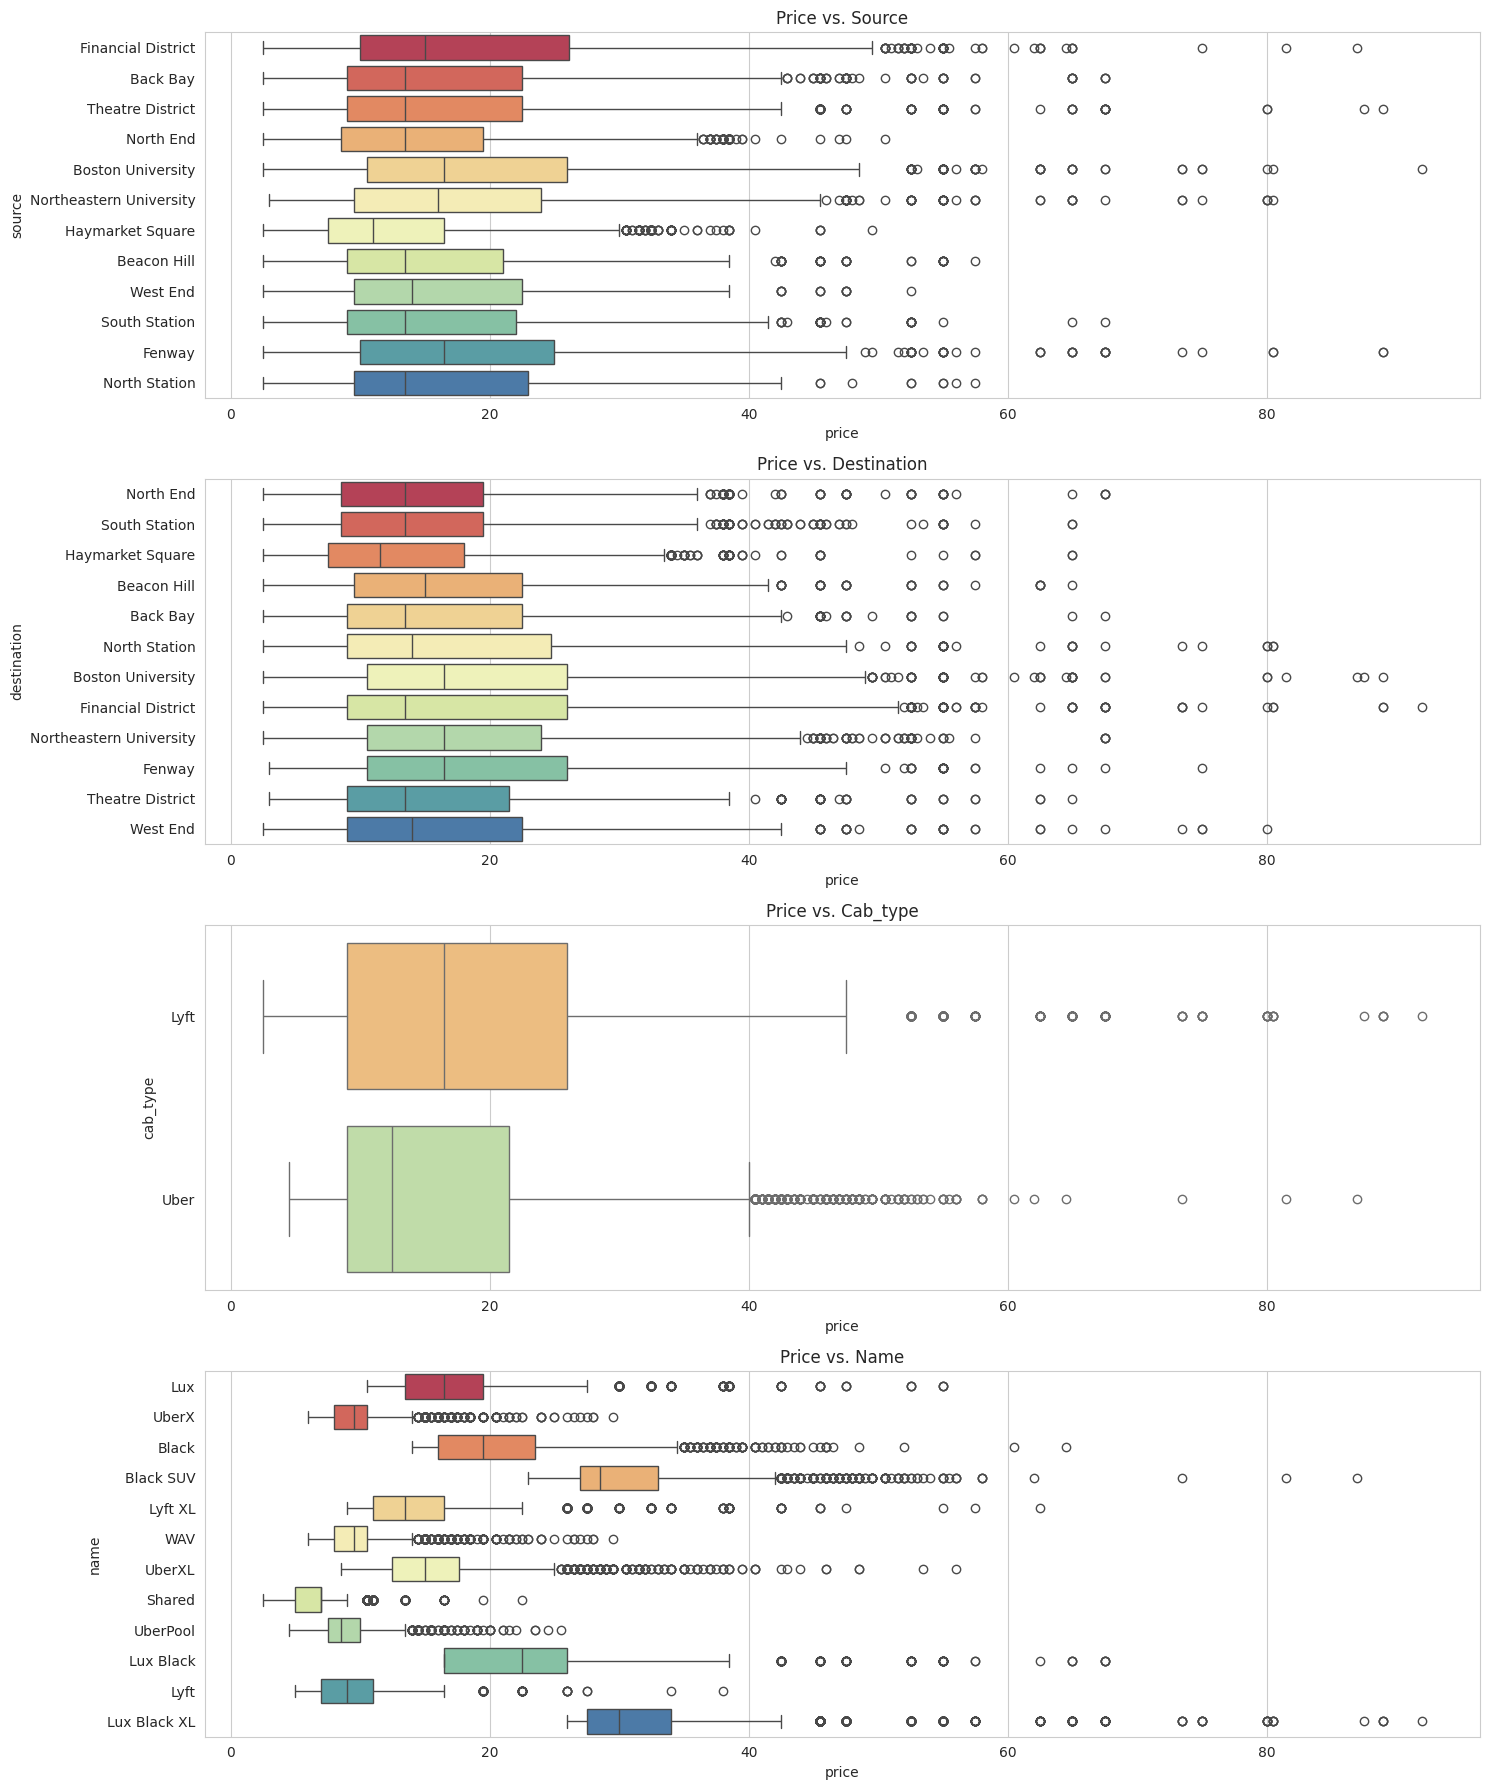

In [32]:
plt.figure(figsize=(15, 18))

for i, feature in enumerate(cat_cols, 1):
    plt.subplot(4, 1, i)
    sns.boxplot(x='price', y=feature, data=df_full_train, hue=feature, palette='Spectral')
    plt.title(f'Price vs. {feature.capitalize()}')

plt.tight_layout()
plt.show()

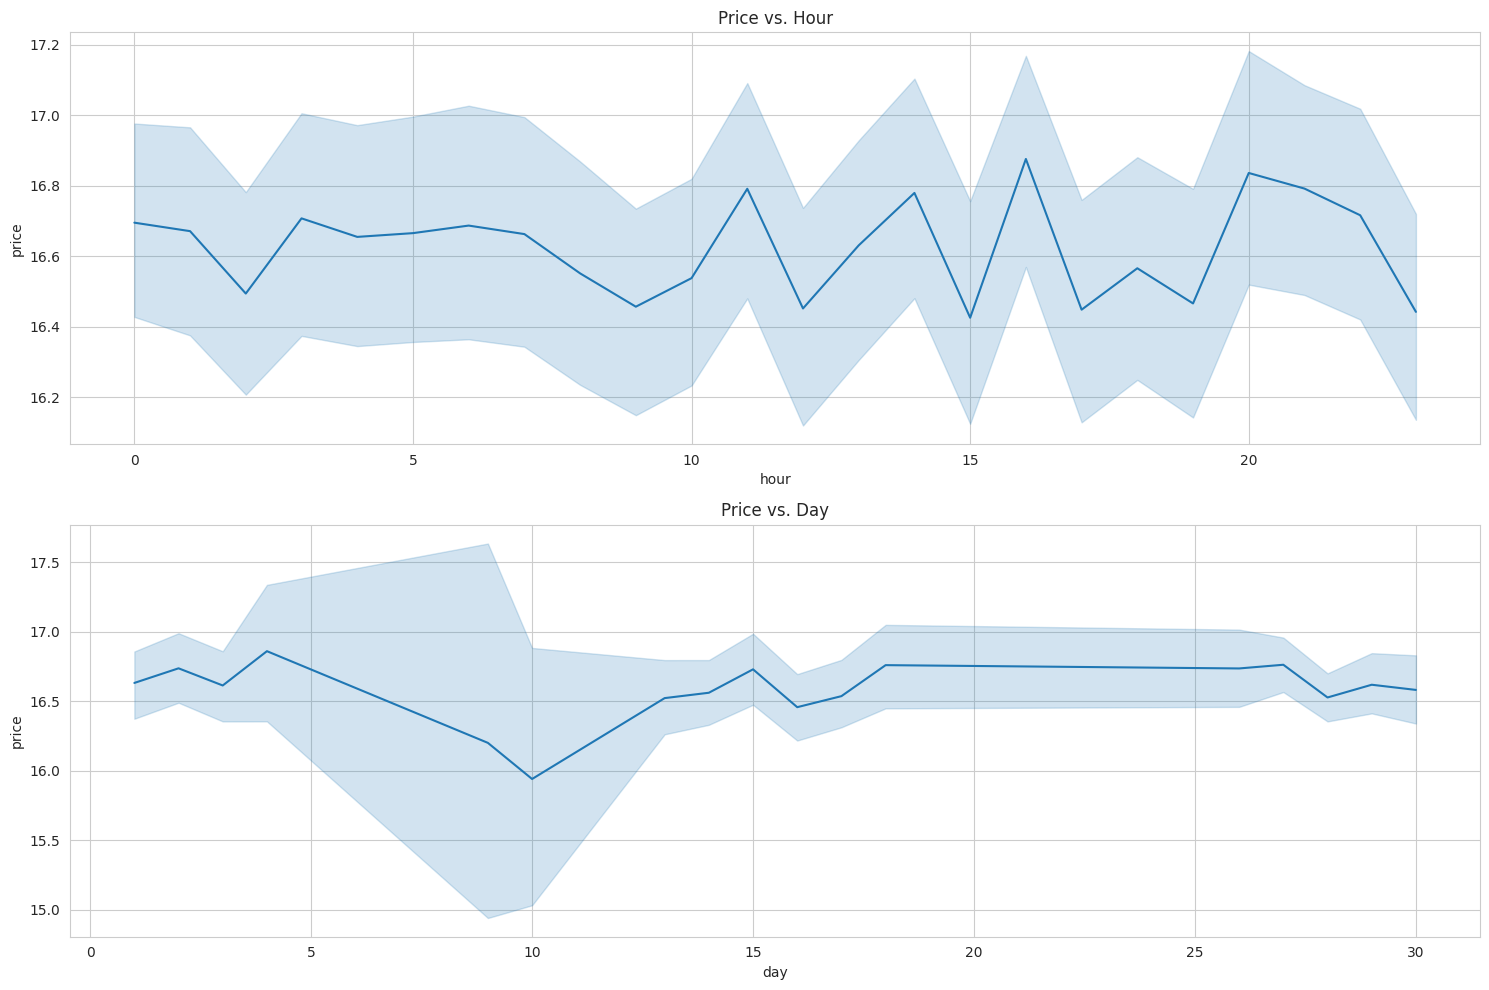

In [33]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(time_cols, 1):
    plt.subplot(2, 1, i)
    sns.lineplot(x=feature, y='price', data=df_full_train)
    plt.title(f'Price vs. {feature.capitalize()}')

plt.tight_layout()
plt.show()

In [34]:
m = folium.Map(location=[df_full_train['latitude'].mean(), df_full_train['longitude'].mean()], zoom_start=12)

heat_data = [[row['latitude'], row['longitude'], row['price']] for index, row in df_full_train.iterrows()]

HeatMap(heat_data, radius=15).add_to(m)